#Machine Learning - Combinação de Modelos (Classificação)

Para este projeto, iremos utilizar os modelos de classificação vistos até então e uni-los nos chamados modelos combinados ainda com o objetivo de prever a variável **smoker**. A combinação de modelos tem como base o princípio da "sabedoria da população", que tem como prerrogativa a noção de que a opinião plural reflete melhor a realidade do que a opinião individual

Utilizaremos:

*   Modelo: Votação (Hard e Soft), Bagging, Random Forest
*   Método de Validação: K-FOLD repetido
*   Métrica: Métricas para Classificação Binária

In [ ]:
import pandas as pd
from sklearn.model_selection import RepeatedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from google.colab.data_table import DataTable

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'

dados = pd.read_csv(url)

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [ ]:
X = dados[['bmi','charges']]
y = dados['smoker']

## Validação K-FOLD Repetido

Para avaliar o modelo, utilizaremos o método de validação cruzada do K-FOLD repetido. Ao repetirmos o processo de K-FOLD mais de uma vez, podemos obter métricas mais estáveis

In [ ]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 5)

##Métricas de Classificação Binária

Utilizaremos a seguinte função para, após a realização do K-FOLD repetido, obtermos as métricas de classificação binária que desejamos calcular. Nesse projeto, as métricas são:


> Acurácia = (vn + vp) / (vn + fp + fn + vp)

> Precisão = vp / (vp + fp)

> Sensibilidade = vp / (vp + fn)

> F1-Score = (2 x Sen x Prec) / (Sen + Prec)



In [ ]:
def MetricasClassBinaria(modelo = LogisticRegression()):
  validacao = cross_validate(modelo, X, y, cv = rkf, scoring = ['accuracy', 'precision', 'recall', 'f1'])
  acc = validacao['test_accuracy'].mean().round(4)
  pre = validacao['test_precision'].mean().round(4)
  rec = validacao['test_recall'].mean().round(4)
  f1 = validacao['test_f1'].mean().round(4)

  print('Acurácia:', acc)
  print('Precisão:', pre)
  print('Sensibilidade:', rec)
  print('F1-Score:', f1)

  metricas = {'Acurácia': acc, 'Precisão': pre, 'Sensibilidade': rec,
                'F1-Score': f1}

  return metricas

##Modelos Individuais

Antes de iniciarmos a combinação de modelos, verificamos como os modelos de classificação que vimos até então se saem ao fazer a previsão da variável **smoker** 

Regressão Logística

In [ ]:
reglog = LogisticRegression()
met_reglog = MetricasClassBinaria(reglog)

Acurácia: 0.9314
Precisão: 0.859
Sensibilidade: 0.803
F1-Score: 0.8261


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


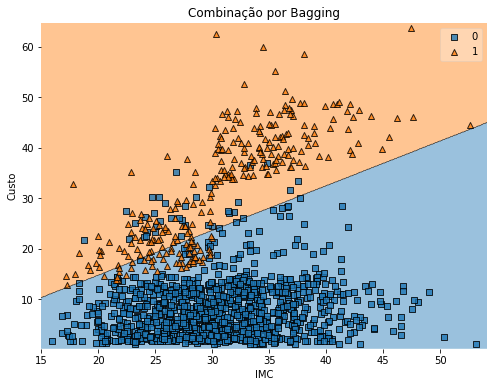

In [ ]:
reglog.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = reglog, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação por Bagging')
plt.show()

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 25)
met_knn = MetricasClassBinaria(knn)

Acurácia: 0.9613
Precisão: 0.8597
Sensibilidade: 0.9677
F1-Score: 0.9087


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


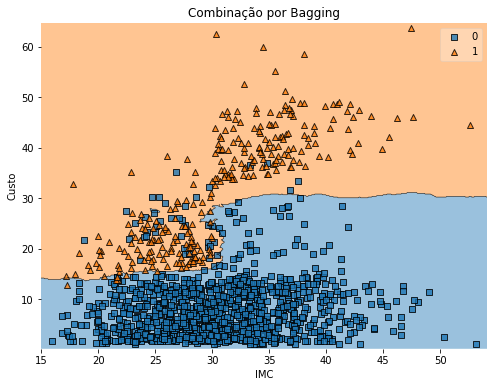

In [ ]:
knn.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = knn, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação por Bagging')
plt.show()

Árvore de Decisão

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3)
met_tree = MetricasClassBinaria(tree)

Acurácia: 0.9632
Precisão: 0.8691
Sensibilidade: 0.9687
F1-Score: 0.9147


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


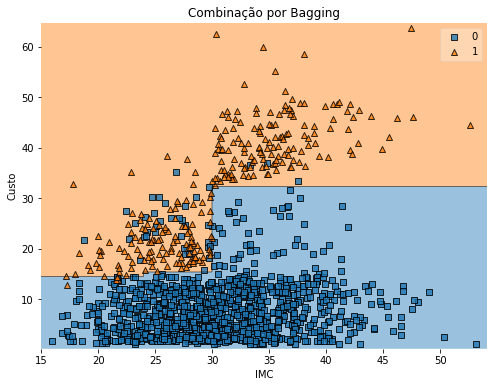

In [ ]:
tree.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = tree, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação por Bagging')
plt.show()

##Combinação de Modelos

Faremos agora a combinação de modelos para verificar como estes modelos combinados se saem na previsão não somente em comparação com os modelos individuais, mas também comparando-os entre si

###Combinação por Votos

Na combinação por votos, recebemos as respostas de vários modelos e verificamos qual foi o valor que a maior parte deles retornou. O retorno final do modelo será baseado no retorno da maioria

In [ ]:
modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', tree)]

####Hard

Na votação Hard, cada modelo retorna um valor de classificação 0 ou 1. A resposta final do modelo combinado estará de acordo com retorno dado pela maior parte dos modelos

In [ ]:
comb_hard = VotingClassifier(modelos, voting = 'hard')
met_hard = MetricasClassBinaria(comb_hard)

Acurácia: 0.9641
Precisão: 0.8682
Sensibilidade: 0.9731
F1-Score: 0.9164


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


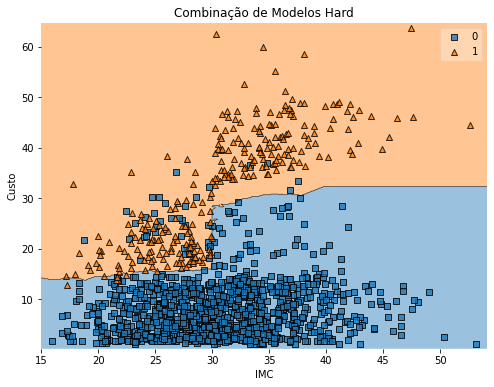

In [ ]:
comb_hard.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = comb_hard, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação de Modelos Hard')
plt.show()

####Soft

Na votação Soft, cada modelo retorna um grau de certeza (probabilidade) para a classificação. A resposta final do modelo combinado será a média das probabilidades retornadas pelos modelos. Se a média calculada for acima de 0.5, o resultado será classificado como 1. Caso contrário, será 0

In [ ]:
comb_soft = VotingClassifier(modelos, voting = 'soft')
met_soft = MetricasClassBinaria(comb_hard)

Acurácia: 0.964
Precisão: 0.8691
Sensibilidade: 0.9721
F1-Score: 0.9164


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


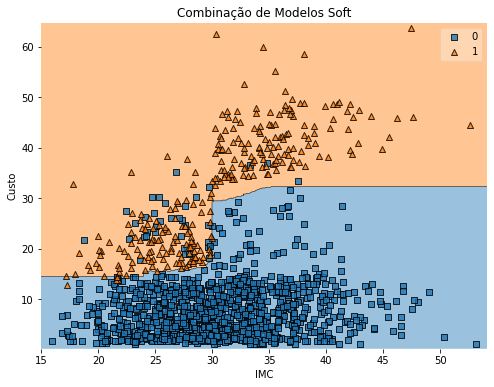

In [ ]:
comb_soft.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = comb_soft, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação de Modelos Soft')
plt.show()

###Bagging

O modelo utiliza das réplicas bootstrap para retirar do conjunto de dados k amostras com reposição com o mesmo tamanho da população original e as distribui ente várias instâncias diferentes do mesmo modelo base. Ao final, promove uma votação entre os modelos para retornar o resultado final

In [ ]:
#modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 25)
modelo_base = DecisionTreeClassifier(max_depth = 3)

In [ ]:
bagging = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base)
met_bag = MetricasClassBinaria(bagging)

Acurácia: 0.964
Precisão: 0.8726
Sensibilidade: 0.9668
F1-Score: 0.9163


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


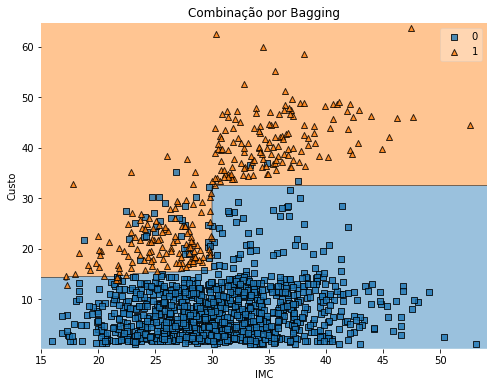

In [ ]:
bagging.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = bagging, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação por Bagging')
plt.show()

###Random Forest

Modelo baseado em árvores de decisão que faz o procedimento bagging ao mesmo tempo em que escolhe aleatoriamente as variávei que vão compor cada modelo de árvore

In [ ]:
ran_for = RandomForestClassifier(n_estimators = 100, max_depth = 3)
met_for = MetricasClassBinaria(ran_for)

Acurácia: 0.957
Precisão: 0.8496
Sensibilidade: 0.9574
F1-Score: 0.8988


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


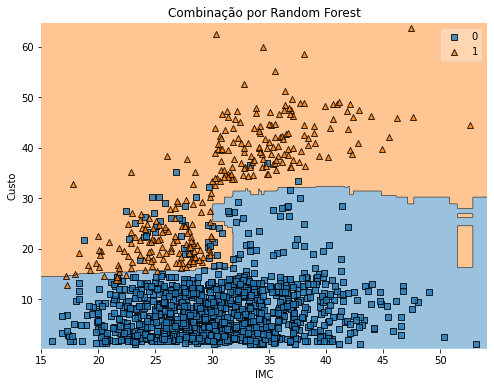

In [ ]:
ran_for.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = ran_for, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('Combinação por Random Forest')
plt.show()

##Comparando Modelos

Podemos, por fim, comparar o desempenho dos modelos de acordo com cada métrica calculada

In [ ]:
metricas = {'Regressão Logística': list(met_reglog.values()),
            'KNN 25 Vizinhos': list(met_knn.values()),
            'Árvore Profundidade 3': list(met_tree.values()),
            'Votação Hard': list(met_hard.values()),
            'Votação Soft': list(met_soft.values()),
            'Bagging': list(met_bag.values()),
            'Floresta Aleatória': list(met_for.values())}

In [ ]:
resultados = pd.DataFrame(metricas, index = met_reglog.keys(), columns = metricas.keys()).T
DataTable(resultados)

,Acurácia,Precisão,Sensibilidade,F1-Score
Regressão Logística,0.9314,0.8590,0.8030,0.8261
KNN 25 Vizinhos,0.9613,0.8597,0.9677,0.9087
Árvore Profundidade 3,0.9632,0.8691,0.9687,0.9147
Votação Hard,0.9641,0.8682,0.9731,0.9164
Votação Soft,0.9640,0.8691,0.9721,0.9164
Bagging,0.9640,0.8726,0.9668,0.9163
Floresta Aleatória,0.9570,0.8496,0.9574,0.8988


#Considerações Finais

Neste projeto, visualizamos o comportamento tanto dos modelos de classificação individuais quanto dos modelos combinados ao fazerem a previsão da variável **smoker**. Ao compará-los, podemos notar que os modelos possuem desempenhos distintos de acordo com a métrica observada. Pode-se concluir, portanto, que não existe apenas um modelo ideal. O melhor modelo a ser empregado é aquele que melhor se enquadra nas necessidades de quem o utilizará